In [57]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [58]:
with pd.io.stata.StataReader("../dta files/2012.dta", convert_categoricals=True) as rdr:
    cols = [c for c in rdr.variable_labels().keys() if c not in {"ISCO88", "SPISCO88"}]
    df_2012 = rdr.read(columns=cols)

with pd.io.stata.StataReader("../dta files/2002.dta", convert_categoricals=True) as rdr:
    cols = [c for c in rdr.variable_labels().keys() if c not in ["v241","v247"]]
    df_2002 = rdr.read(columns=cols)

df_2022=pd.read_stata("../dta files/2022.dta")

## Who does more household work when both pool their income (From the perspective of women)
Relevant Questions: 
# For 2002:
1. "V29": "Q7 Organizing income in partnership",
2. "v36": "Q9a How many hours do you spend on hh work"
3. "v37": "Q9b How many hrs spouse,partner works on hh"
4. "V200": "R: Sex (SEX)"

# For 2012:
1. "V41": "Q18 Sharing of income between partners",
2. "V37": "Q16a How many hours spend on household work"
3. "V39": "Q17a How many hours spouse, partner works on household" 

# For 2022:
1. "v38": "Q17 Sharing of income between partners",
2. "v34": "Q15a How many hours spend on household work",
3. "v36": "Q16a How many hours spouse, partner works on household",

In [59]:
df_2002=df_2002[df_2002['v202']=='Marr,liv as mar']
df_2012=df_2012[df_2012['MARITAL']=='Married']
df_2022=df_2022[df_2022['MARITAL']=="1. Married"]

def fix_hh_hours(x):
    invalid_options=[
        "Don't know, BG: can't choose",
        'No answer, CA: no answer, refused',
        "Don't know, BG: can't choose, KR: don't know, refused",
        'No answer, CA: no answer, refused',
        'NAP, no partner (3 (AR,AT,BE,CH,CL,ES,IS,KR,NL,NO,PL,SK,US:2,3; BG,CZ,PT:2,3,7;IL:3,7) in PARTLIV;TW:3-6 in MARITAL)',
        "-9. No answer; HR, IS: DK/NA; ES, HU: Can't Ch/NA; LT: NA/DK/Hard to say; PL: Hard to say/NA; TW: Can't choose",
        "-9. No answer; HR, IS: DK/NA; ES, HU, TW: Can't Ch/NA; LT: NA/DK/Hard to say; PL: Hard to say/NA",
       '-4. NAP, no partn. or not liv. with part. (c.2,3,-7 PARTLIV; US: c.2 (if neither married nor cohabit. with partner), 3 PARTL'
                     ]
    if x in invalid_options:
        return None
    if isinstance(x, str):
        x = x.strip()
        if x.startswith("None") or x.startswith("0"):
            return 0
        elif x.startswith("95"):
            return 95
        elif x.startswith("1"):
            return 1
        elif x.startswith("2"):
            return 2
        elif x.startswith("3"):
            return 3
        else:
            return int(x)
    return x


df_2002_p=df_2002[df_2002['v29'].isin(['We pool all the money', 'We pool some money'])]
df_2002_p['v36']=df_2002_p['v36'].apply(fix_hh_hours)
df_2002_p['v37']=df_2002_p['v37'].apply(fix_hh_hours)
df_2002_p["hh_bin"] = pd.cut(
    df_2002_p["v36"],
    bins=[0, 20, 40, 60, 80, 100],
    labels=["0–20", "21–40", "41–60", "61–80", "81+"]
)
df_2002_p["spouse_hh_bin"] = pd.cut(
    df_2002_p["v37"],
    bins=[0, 20, 40, 60, 80, 100],
    labels=["0–20", "21–40", "41–60", "61–80", "81+"]
)

df_2012_p=df_2012[df_2012['V41'].isin(['We pool all money, each take out', 'We pool some money, rest separate'])]
df_2012_p['V37']=df_2012_p['V37'].apply(fix_hh_hours)
df_2012_p['V39']=df_2012_p['V39'].apply(fix_hh_hours)

df_2012_p["hh_bin"] = pd.cut(
    df_2012_p["V37"],
    bins=[0, 20, 40, 60, 80, 100],
    labels=["0–20", "21–40", "41–60", "61–80", "81+"]
)
df_2012_p["spouse_hh_bin"] = pd.cut(
    df_2012_p["V39"],
    bins=[0, 20, 40, 60, 80, 100],
    labels=["0–20", "21–40", "41–60", "61–80", "81+"]
)

df_2022_p=df_2022[df_2022['v38'].isin([ '3. We pool all money, each take out','4. We pool some money, rest separate'])]
df_2022_p['v34']=df_2022_p['v34'].apply(fix_hh_hours)
df_2022_p['v36']=df_2022_p['v36'].apply(fix_hh_hours)

df_2022_p["hh_bin"] = pd.cut(
    df_2022_p["v34"],
    bins=[0, 20, 40, 60, 80, 100],
    labels=["0–20", "21–40", "41–60", "61–80", "81+"]
)
df_2022_p["spouse_hh_bin"] = pd.cut(
    df_2022_p["v36"],
    bins=[0, 20, 40, 60, 80, 100],
    labels=["0–20", "21–40", "41–60", "61–80", "81+"]
)


/var/folders/7h/y6lh43p93vl_bgy8rc2z416c0000gn/T/ipykernel_87538/2545839793.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2002_p['v36']=df_2002_p['v36'].apply(fix_hh_hours)
/var/folders/7h/y6lh43p93vl_bgy8rc2z416c0000gn/T/ipykernel_87538/2545839793.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2002_p['v37']=df_2002_p['v37'].apply(fix_hh_hours)
/var/folders/7h/y6lh43p93vl_bgy8rc2z416c0000gn/T/ipykernel_87538/2545839793.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [60]:
def sex_mapping(x):
    if "Female" in x:
        return 2
    elif "Male" in x:
        return 1
    else:
        return 0

df_2022_p['sex']=df_2022_p['SEX'].apply(sex_mapping)   
df_2002_p['sex']=df_2002_p['v200'].apply(sex_mapping)
df_2012_p['sex']=df_2012_p['SEX'].apply(sex_mapping)

/var/folders/7h/y6lh43p93vl_bgy8rc2z416c0000gn/T/ipykernel_87538/1355992804.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_p['sex']=df_2022_p['SEX'].apply(sex_mapping)
/var/folders/7h/y6lh43p93vl_bgy8rc2z416c0000gn/T/ipykernel_87538/1355992804.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2002_p['sex']=df_2002_p['v200'].apply(sex_mapping)
/var/folders/7h/y6lh43p93vl_bgy8rc2z416c0000gn/T/ipykernel_87538/1355992804.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [61]:
import numpy as np
import matplotlib.pyplot as plt
bin_order = ["0–20", "21–40", "41–60", "61–80", "81+"]
def plot_hh_bins_by_sex(df, sex_value, sex_label):
    # 1. Filter by sex
    d = df[df["sex"] == sex_value]

    # 2. Percentage distributions
    resp = (
        d["hh_bin"]
        .value_counts(normalize=True)
        .reindex(bin_order)
        * 100
    )

    spouse = (
        d["spouse_hh_bin"]
        .value_counts(normalize=True)
        .reindex(bin_order)
        * 100
    )

    # 3. Plot
    x = np.arange(len(bin_order))
    width = 0.35

    plt.figure()
    plt.bar(x - width/2, resp.values, width, label="Respondent")
    plt.bar(x + width/2, spouse.values, width, label="Spouse/Partner")

    plt.xlabel("Household work hours per week")
    plt.ylabel("Percentage")
    plt.title(f"Household work hours distribution ({sex_label}, 2022)")
    plt.xticks(x, bin_order)
    plt.legend()
    plt.tight_layout()
    plt.show()


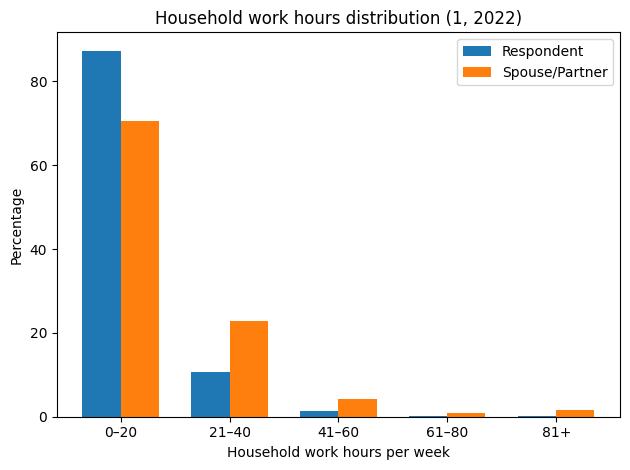

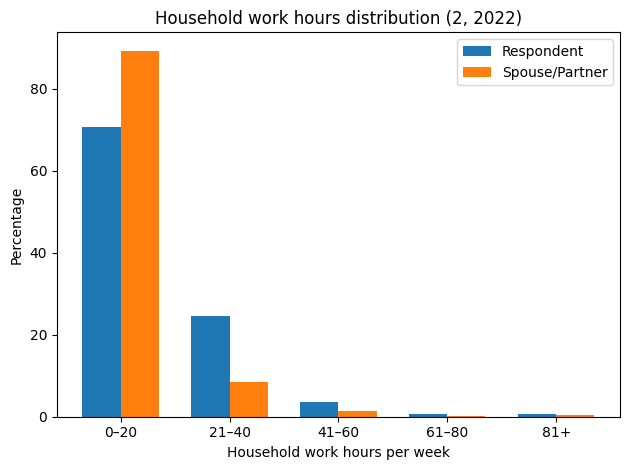

In [62]:
plot_hh_bins_by_sex(df_2022_p, sex_value=1, sex_label=1)
plot_hh_bins_by_sex(df_2022_p, sex_value=2, sex_label=2)


In [65]:
print(df_2022_p[df_2022_p['sex']==1]['v34'].mean())
print(df_2022_p[df_2022_p['sex']==1]['v36'].mean())

11.231527797627555
18.440138808559862


In [86]:
print(df_2022_p[(df_2022_p['sex']==2)& ((df_2022_p['MAINSTAT']=='1. In paid work'))]['v34'].mean())
print(df_2022_p[(df_2022_p['sex']==2) & ((df_2022_p['MAINSTAT']=='1. In paid work'))]['v36'].mean())

15.462417180717386
9.018776077885953


In [ ]:
df_2022['v34']=df_2022['v34'].apply(fix_hh_hours)
df_2022['v36']=df_2022['v36'].apply(fix_hh_hours)


In [69]:
df_2022['sex']=df_2022['SEX'].apply(sex_mapping) 

In [70]:
print(df_2022[df_2022['sex']==2]['v34'].mean())
print(df_2022[df_2022['sex']==2]['v36'].mean())

18.251152482269504
9.742866467735919


In [71]:
print(df_2022[df_2022['sex']==1]['v34'].mean())
print(df_2022[df_2022['sex']==1]['v36'].mean())

11.380062012590434
18.921885653063214


In [72]:
df_2022['v38'].cat.categories

Index(['-9. No answer; AT, ES, NL: Can't Ch/NA; IS: NA/DK; LT: NA/DK/Hard to say; TW: Others',
       '-4. NAP, no partn. or not liv. with part. (c.2,3,-7 PARTLIV; US: c.2 (if neither married nor cohabit. with partner), 3 PARTL',
       '1. I manage all and give partner his share',
       '2. Partner manages all and gives me my share',
       '3. We pool all money, each take out',
       '4. We pool some money, rest separate',
       '5. We each keep own money separate'],
      dtype='object')

In [81]:
df_2022['WORK'].cat.categories

Index(['-9. No answer', '1. Currently in paid work,',
       '2. Currently not in paid work, paid work in the past',
       '3. Never had paid work'],
      dtype='object')

In [83]:
df_2022_me=df_2022[(df_2022['v38'].isin(["1. I manage all and give partner his share"]))]

In [79]:
print(df_2022_me[df_2022_me['sex']==1]['v34'].mean())
print(df_2022_me[df_2022_me['sex']==1]['v36'].mean())

12.07497243660419
22.62513661202186


In [84]:
df_2022['MAINSTAT'].cat.categories

Index(['-9. No answer', '1. In paid work',
       '2. Unemployed and looking for a job', '3. In education',
       '4. Apprentice or trainee', '5. Permanently sick or disabled',
       '6. Retired', '7. Domestic work',
       '8. In compulsory military service or community service', '9. Other'],
      dtype='object')

In [99]:
print(df_2022_me[(df_2022_me['sex']==2) & (df_2022_me['MAINSTAT']=='1. In paid work') & (df_2022_me['SPMAINST'].isin(['2. Unemployed and looking for a job']))]['v34'].mean())
print(df_2022_me[(df_2022_me['sex']==2) & (df_2022_me['MAINSTAT']=='1. In paid work') & (df_2022_me['SPMAINST'].isin(['2. Unemployed and looking for a job']))]['v36'].mean())

20.333333333333332
13.875


In [89]:
print(df_2022_me[(df_2022_me['sex']==1) & (df_2022_me['MAINSTAT']=='1. In paid work') & (df_2022_me['SPMAINST']=='1. In paid work')]['v34'].mean())
print(df_2022_me[(df_2022_me['sex']==1) & (df_2022_me['MAINSTAT']=='1. In paid work') & (df_2022_me['SPMAINST']=='1. In paid work')]['v36'].mean())

9.482300884955752
18.475555555555555


In [90]:
print(df_2022_me[(df_2022_me['sex']==2) & (df_2022_me['MAINSTAT']=='1. In paid work') & (df_2022_me['SPMAINST']=='1. In paid work')]['v34'].mean())
print(df_2022_me[(df_2022_me['sex']==2) & (df_2022_me['MAINSTAT']=='1. In paid work') & (df_2022_me['SPMAINST']=='1. In paid work')]['v36'].mean())

19.850855745721272
8.456575682382134


In [92]:
df_2022['v38'].cat.categories

Index(['-9. No answer; AT, ES, NL: Can't Ch/NA; IS: NA/DK; LT: NA/DK/Hard to say; TW: Others',
       '-4. NAP, no partn. or not liv. with part. (c.2,3,-7 PARTLIV; US: c.2 (if neither married nor cohabit. with partner), 3 PARTL',
       '1. I manage all and give partner his share',
       '2. Partner manages all and gives me my share',
       '3. We pool all money, each take out',
       '4. We pool some money, rest separate',
       '5. We each keep own money separate'],
      dtype='object')

In [93]:
df_2022_ot=df_2022[(df_2022['v38'].isin(['2. Partner manages all and gives me my share']))]

In [94]:
print(df_2022_ot[(df_2022_ot['sex']==2) & (df_2022_ot['MAINSTAT']=='1. In paid work') & (df_2022_ot['SPMAINST']=='1. In paid work')]['v34'].mean())
print(df_2022_ot[(df_2022_ot['sex']==2) & (df_2022_ot['MAINSTAT']=='1. In paid work') & (df_2022_ot['SPMAINST']=='1. In paid work')]['v36'].mean())

19.316384180790962
8.795454545454545


In [98]:
print(df_2022_ot[(df_2022_ot['sex']==2) & (df_2022_ot['MAINSTAT']=='1. In paid work') & (df_2022_ot['SPMAINST'].isin(['2. Unemployed and looking for a job']))]['v34'].mean())
print(df_2022_ot[(df_2022_ot['sex']==2) & (df_2022_ot['MAINSTAT']=='1. In paid work') & (df_2022_ot['SPMAINST'].isin(['2. Unemployed and looking for a job']))]['v36'].mean())

18.571428571428573
11.142857142857142


In [100]:
print(df_2022_p[(df_2022_p['sex']==2) & (df_2022_p['MAINSTAT']=='1. In paid work') & (df_2022_p['SPMAINST']=='1. In paid work')]['v34'].mean())
print(df_2022_p[(df_2022_p['sex']==2) & (df_2022_p['MAINSTAT']=='1. In paid work') & (df_2022_p['SPMAINST']=='1. In paid work')]['v36'].mean())

15.343834141087775
8.508469945355191


In [101]:
print(df_2022_p[(df_2022_p['sex']==1) & (df_2022_p['MAINSTAT']=='1. In paid work') & (df_2022_p['SPMAINST']=='1. In paid work')]['v34'].mean())
print(df_2022_p[(df_2022_p['sex']==1) & (df_2022_p['MAINSTAT']=='1. In paid work') & (df_2022_p['SPMAINST']=='1. In paid work')]['v36'].mean())

10.177883096366509
16.21573033707865


In [110]:
df_2022_p['v60'].value_counts(normalize=True)*100

v60
3. Neither easy nor difficult    37.817818
4. Fairly easy                   25.258592
2. Fairly difficult              17.744411
5. Very easy                     13.173173
1. Very difficult                 4.971638
-8. Can't choose                  0.767434
-9. No answer                     0.266934
Name: proportion, dtype: float64

In [111]:
df_2022_me['v60'].value_counts(normalize=True)*100

v60
3. Neither easy nor difficult    33.949802
2. Fairly difficult              29.898723
4. Fairly easy                   16.204315
1. Very difficult                14.354910
5. Very easy                      4.755614
-8. Can't choose                  0.792602
-9. No answer                     0.044033
Name: proportion, dtype: float64

In [114]:
df_2022_ot[df_2022_ot['sex']==2]['v46'].value_counts(normalize=True)*100

v46
-4. Doesn't apply/no job; TW: NAP (code 2,3,5,6,7 in MAINSTAT)    48.701299
4. Never                                                          14.415584
2. Several times a month                                          12.857143
3. Once or twice                                                  12.207792
1. Several times a week                                            8.701299
-9. No answer; LT: NA/DK/Hard to say                               1.948052
-8. DE: Can't choose                                               0.649351
-1. DK: Not available                                              0.519481
Name: proportion, dtype: float64

In [ ]:
df_2022

Index([                     '-9. No answer',
                           '-8. Don't know',
            '-4. NAP (code 2 or 3 in WORK)',
                    '-1. DK: Not available',
                              '1. One hour',
                                          2,
                                          3,
                                          4,
                                          5,
                                          6,
                                          7,
                                          8,
                                          9,
                                         10,
                                         11,
                                         12,
                                         13,
                                         14,
                                         15,
                                         16,
                                         17,
                                         18,
          

In [117]:
df_2022['WORK']

3                               1. Currently in paid work,
4                               1. Currently in paid work,
6        2. Currently not in paid work, paid work in th...
9        2. Currently not in paid work, paid work in th...
11                              1. Currently in paid work,
                               ...                        
45739                               3. Never had paid work
45745                           1. Currently in paid work,
45747                               3. Never had paid work
45757                           1. Currently in paid work,
45761                               3. Never had paid work
Name: WORK, Length: 22862, dtype: category
Categories (4, object): ['-9. No answer' < '1. Currently in paid work,' < '2. Currently not in paid work, paid work in t... < '3. Never had paid work']

In [118]:
summary = (
    df_2022_p
    .query("sex in [1, 2]")
    .groupby(["sex", "MAINSTAT", "SPMAINST"])
    .agg(
        resp_hours=("v34", "mean"),
        spouse_hours=("v36", "mean"),
        n=("v34", "size")
    )
    .round(1)
    .reset_index()
    .sort_values(["sex", "MAINSTAT", "SPMAINST"])
)
summary

/var/folders/7h/y6lh43p93vl_bgy8rc2z416c0000gn/T/ipykernel_87538/172199659.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2022_p


,sex,MAINSTAT,SPMAINST,resp_hours,spouse_hours,n
0,0,-9. No answer,-9. No answer,NaN,NaN,0
1,0,-9. No answer,"-4. NAP (c.3,-7 PARTLIV; US: c. 2 (if neither ...",NaN,NaN,0
2,0,-9. No answer,-1. Not available (TH),NaN,NaN,0
3,0,-9. No answer,1. In paid work,NaN,NaN,0
4,0,-9. No answer,2. Unemployed and looking for a job,NaN,NaN,0
...,...,...,...,...,...,...
355,2,9. Other,5. Permanently sick or disabled,56.0,56.0,1
356,2,9. Other,6. Retired,18.6,12.1,26
357,2,9. Other,7. Domestic work,NaN,NaN,0
358,2,9. Other,8. In compulsory military service or community...,NaN,NaN,0


/var/folders/7h/y6lh43p93vl_bgy8rc2z416c0000gn/T/ipykernel_87538/1287622175.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_2022_p


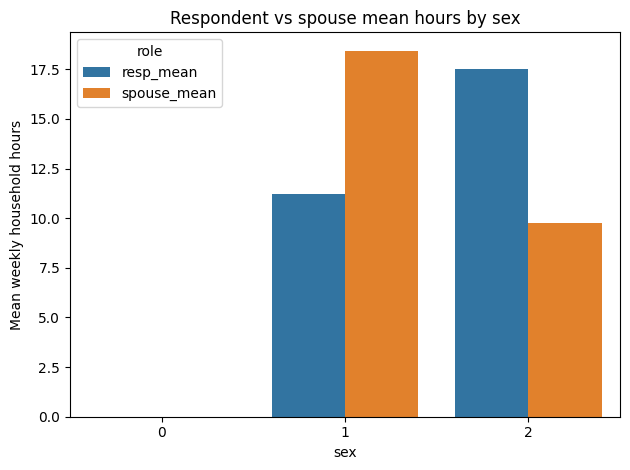

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_df = (
    df_2022_p
    .query("sex in [1, 2]")
    .groupby("sex")
    .agg(resp_mean=("v34", "mean"), spouse_mean=("v36", "mean"))
    .reset_index()
    .melt(id_vars="sex", value_vars=["resp_mean", "spouse_mean"], var_name="role", value_name="hours")
)

sns.barplot(data=plot_df, x="sex", y="hours", hue="role")
plt.ylabel("Mean weekly household hours")
plt.title("Respondent vs spouse mean hours by sex")
plt.tight_layout()
plt.show()

In [122]:
h_df=pd.read_csv("../data/harmonized/issp_harmonized_2002_2012_2022.csv")

In [128]:
h_df=h_df[h_df['marital_status']==1]

In [135]:
# Drop invalid sex code (-9) and keep male/female only
h_df = h_df[h_df["sex"].isin([1, 2])].copy()

In [129]:
h_df['work_status']

0         2.0
1         5.0
2         7.0
3         7.0
4         2.0
         ... 
142814    3.0
142820    1.0
142822    3.0
142832    1.0
142836    3.0
Name: work_status, Length: 77407, dtype: float64

In [134]:
h_df['work_status'].unique()

array([ 2.,  5.,  7.,  1.,  8., 10., nan,  6.,  4.,  9.,  3., -9.])

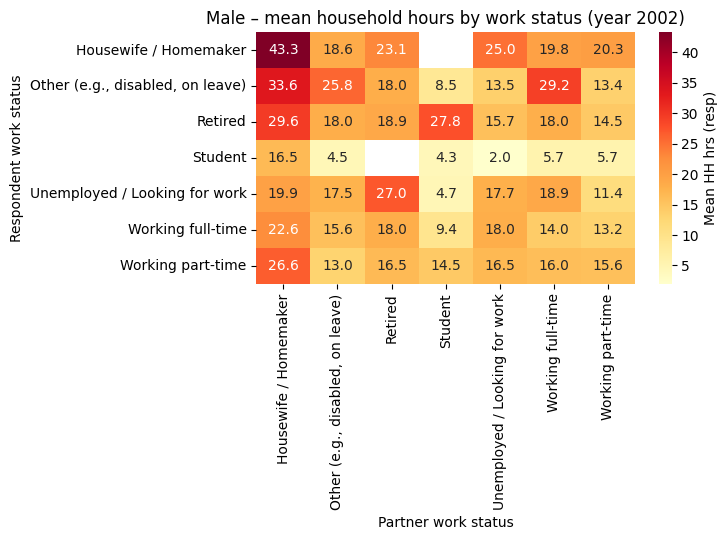

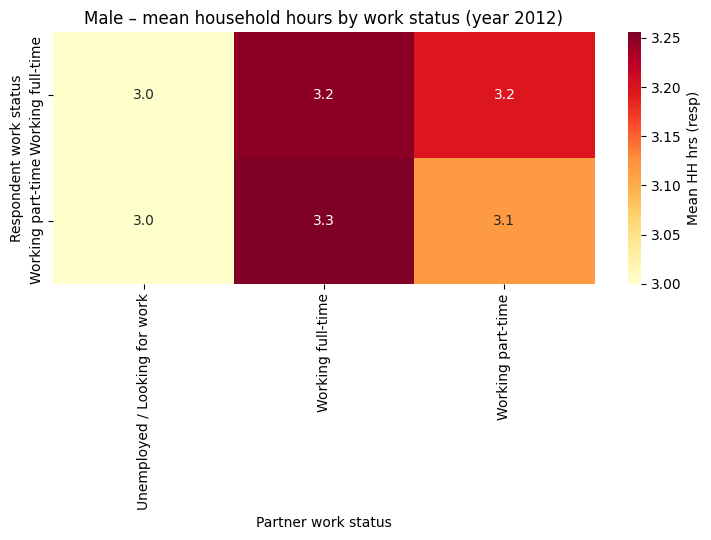

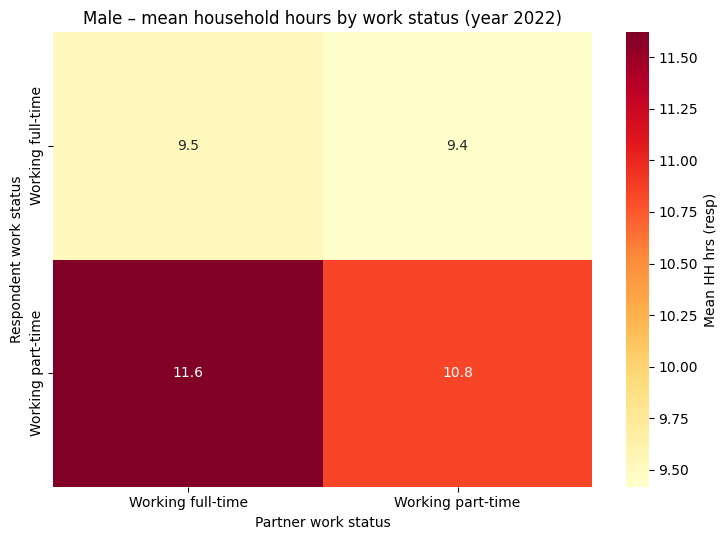

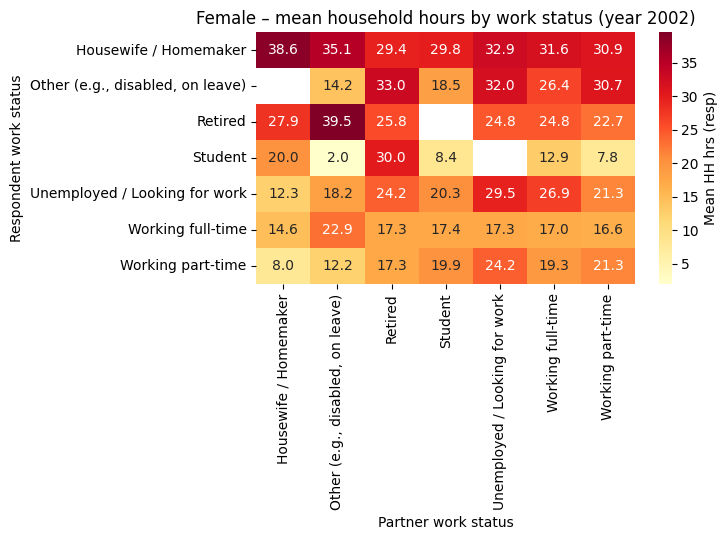

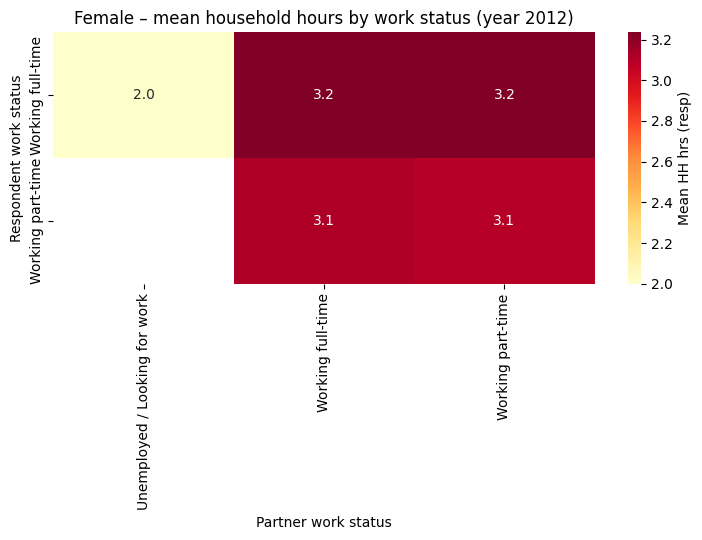

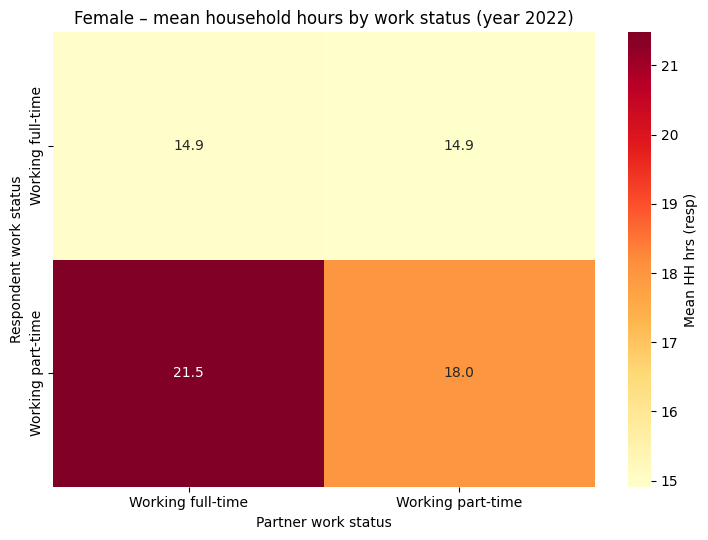

In [137]:
# Heatmaps: mean respondent HH hours by respondent/partner work status, split by sex and year
import yaml
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only rows with household hour data
h_heat = h_df.dropna(subset=["hh_work_hours_respondent"])

# Load work-status labels from crosswalk
with open("../data/harmonized/variable_value_mapping.yaml", "r") as f:
    value_map = yaml.safe_load(f)["variables"]
work_label_map = value_map["work_status"]["codes"]
partner_work_label_map = value_map["partner_work_status"]["codes"]
missing_codes = {-9, -8, -4}

palette = "YlOrRd"

def plot_hh_heatmaps_by_sex(df, sex_value, sex_label):
    subset = df[df["sex"] == sex_value].copy()
    # map codes to labels, drop missing codes
    subset["work_status_label"] = (
        subset["work_status"]
        .astype("Int64")
        .where(~subset["work_status"].isin(missing_codes))
        .map(work_label_map)
    )
    subset["partner_work_status_label"] = (
        subset["partner_work_status"]
        .astype("Int64")
        .where(~subset["partner_work_status"].isin(missing_codes))
        .map(partner_work_label_map)
    )
    subset = subset.dropna(subset=["work_status_label", "partner_work_status_label"])

    grouped = (
        subset
        .groupby(["survey_year", "work_status_label", "partner_work_status_label"])
        ["hh_work_hours_respondent"]
        .mean()
        .reset_index()
    )
    for year, g_year in grouped.groupby("survey_year"):
        pivot = g_year.pivot(
            index="work_status_label",
            columns="partner_work_status_label",
            values="hh_work_hours_respondent",
        )
        plt.figure(figsize=(7.5, 5.5))
        sns.heatmap(pivot, annot=True, fmt=".1f", cmap=palette, cbar_kws={"label": "Mean HH hrs (resp)"})
        plt.title(f"{sex_label} – mean household hours by work status (year {int(year)})")
        plt.xlabel("Partner work status")
        plt.ylabel("Respondent work status")
        plt.tight_layout()
        plt.show()

plot_hh_heatmaps_by_sex(h_heat, sex_value=1, sex_label="Male")
plot_hh_heatmaps_by_sex(h_heat, sex_value=2, sex_label="Female")

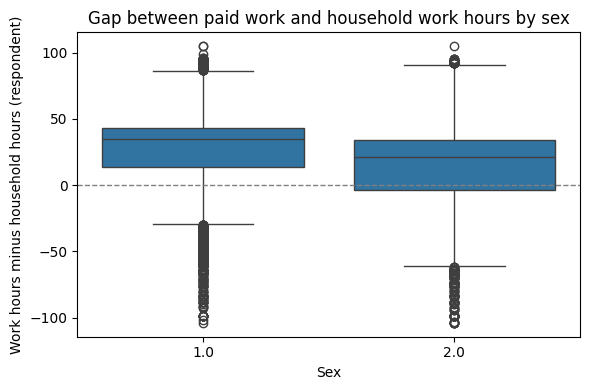

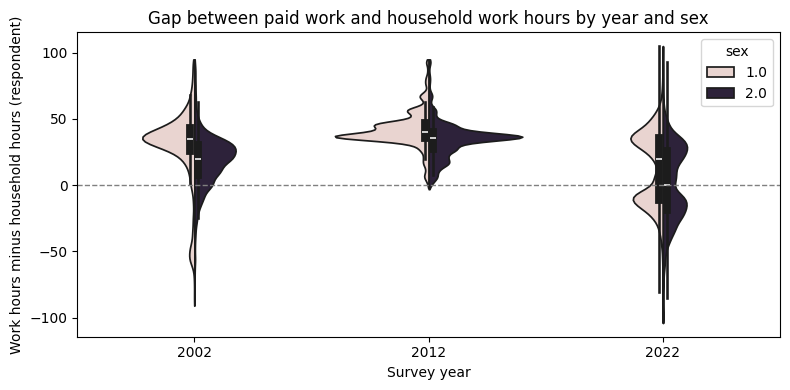

In [138]:
# Difference between paid work hours and household hours (respondent)
h_diff = h_df.dropna(subset=["work_hours", "hh_work_hours_respondent"]).copy()
h_diff["work_minus_hh"] = h_diff["work_hours"] - h_diff["hh_work_hours_respondent"]

plt.figure(figsize=(6, 4))
sns.boxplot(data=h_diff, x="sex", y="work_minus_hh")
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.ylabel("Work hours minus household hours (respondent)")
plt.xlabel("Sex")
plt.title("Gap between paid work and household work hours by sex")
plt.tight_layout()
plt.show()

# Optional: distribution by year and sex for more detail
plt.figure(figsize=(8, 4))
sns.violinplot(data=h_diff, x="survey_year", y="work_minus_hh", hue="sex", split=True, cut=0)
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.ylabel("Work hours minus household hours (respondent)")
plt.xlabel("Survey year")
plt.title("Gap between paid work and household work hours by year and sex")
plt.tight_layout()
plt.show()

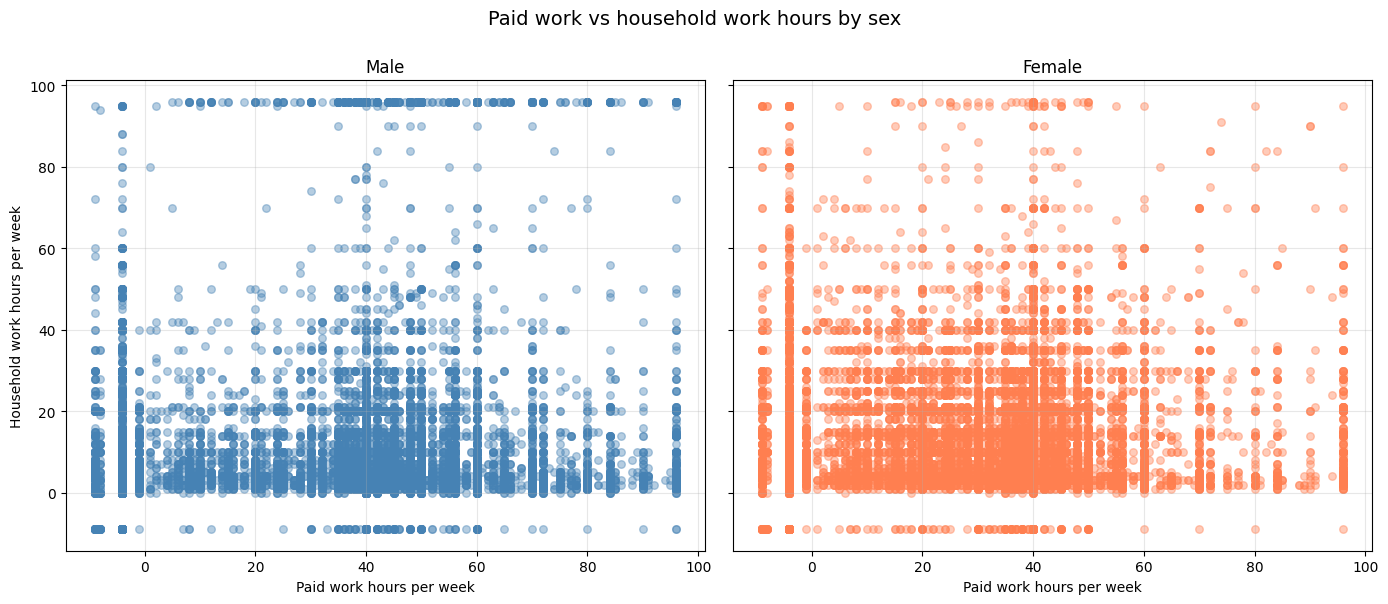

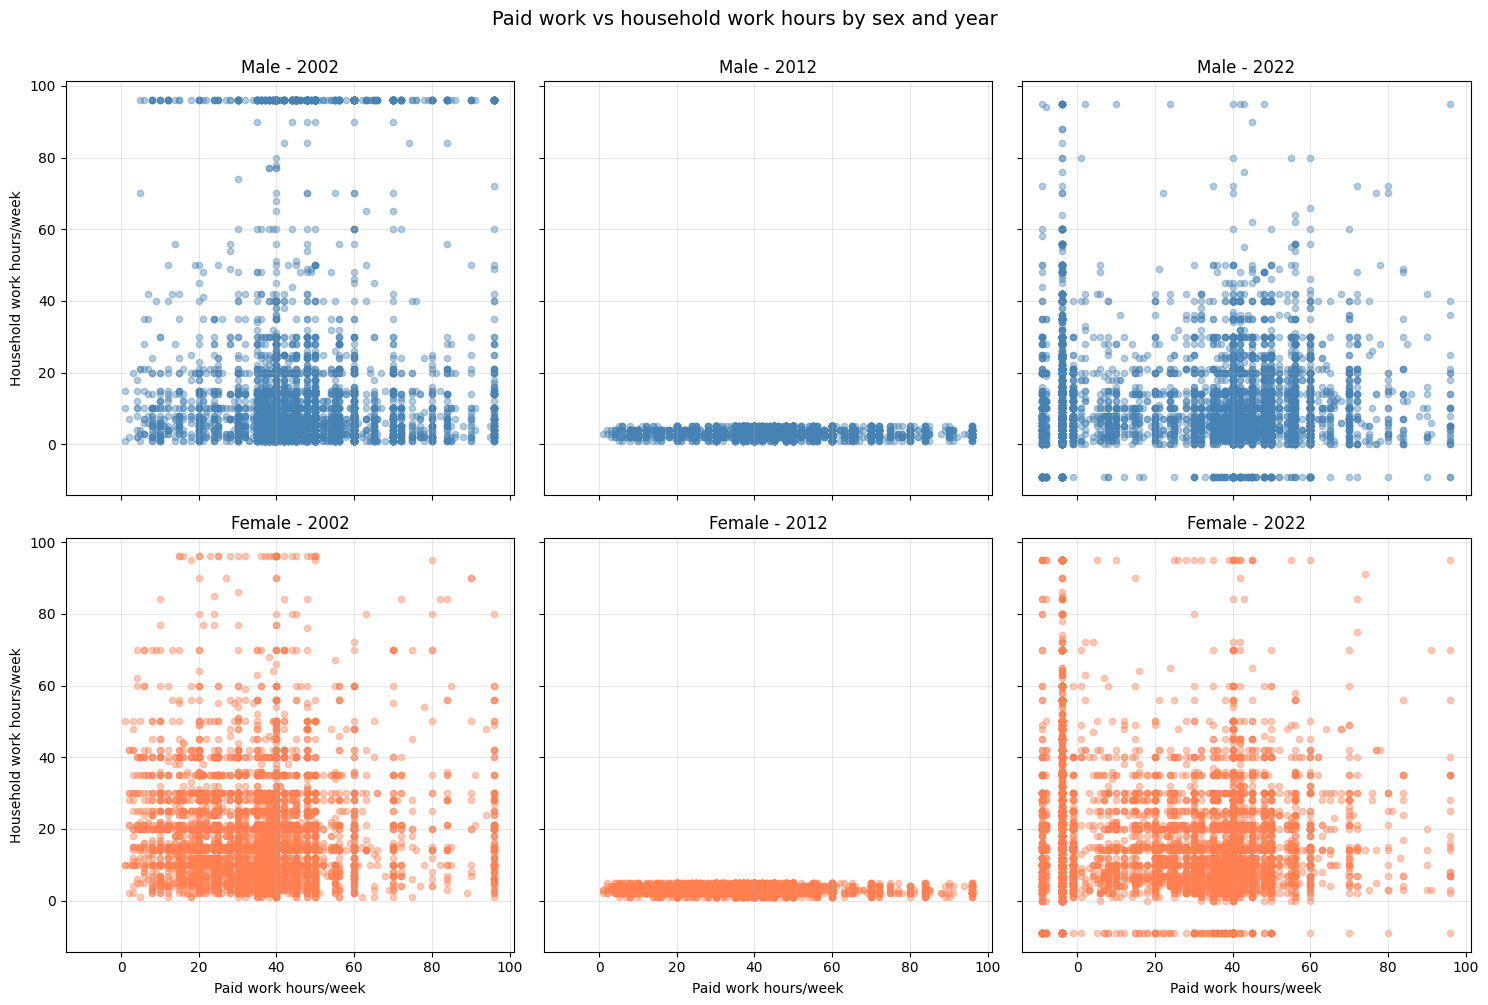

In [140]:
# Scatter plot: paid work hours vs household work hours - separate plots for males and females
scatter_df = h_df.dropna(subset=["work_hours", "hh_work_hours_respondent"]).copy()

# Map sex codes to labels
sex_labels = {1: "Male", 2: "Female"}
colors = {1: "steelblue", 2: "coral"}

# Create two separate plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for i, (sex_val, label) in enumerate(sex_labels.items()):
    sex_data = scatter_df[scatter_df["sex"] == sex_val]
    axes[i].scatter(
        sex_data["work_hours"],
        sex_data["hh_work_hours_respondent"],
        alpha=0.4,
        s=30,
        color=colors[sex_val]
    )
    axes[i].set_xlabel("Paid work hours per week")
    axes[i].set_title(f"{label}")
    axes[i].grid(alpha=0.3)
    if i == 0:
        axes[i].set_ylabel("Household work hours per week")

plt.suptitle("Paid work vs household work hours by sex", y=1.00, fontsize=14)
plt.tight_layout()
plt.show()

# Separate plots by year and sex
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)

for sex_idx, (sex_val, sex_label) in enumerate(sex_labels.items()):
    for year_idx, year in enumerate([2002, 2012, 2022]):
        plot_data = scatter_df[(scatter_df["sex"] == sex_val) & (scatter_df["survey_year"] == year)]
        axes[sex_idx, year_idx].scatter(
            plot_data["work_hours"],
            plot_data["hh_work_hours_respondent"],
            alpha=0.4,
            s=20,
            color=colors[sex_val]
        )
        axes[sex_idx, year_idx].set_title(f"{sex_label} - {year}")
        axes[sex_idx, year_idx].grid(alpha=0.3)
        
        if year_idx == 0:
            axes[sex_idx, year_idx].set_ylabel("Household work hours/week")
        if sex_idx == 1:
            axes[sex_idx, year_idx].set_xlabel("Paid work hours/week")

plt.suptitle("Paid work vs household work hours by sex and year", y=1.00, fontsize=14)
plt.tight_layout()
plt.show()

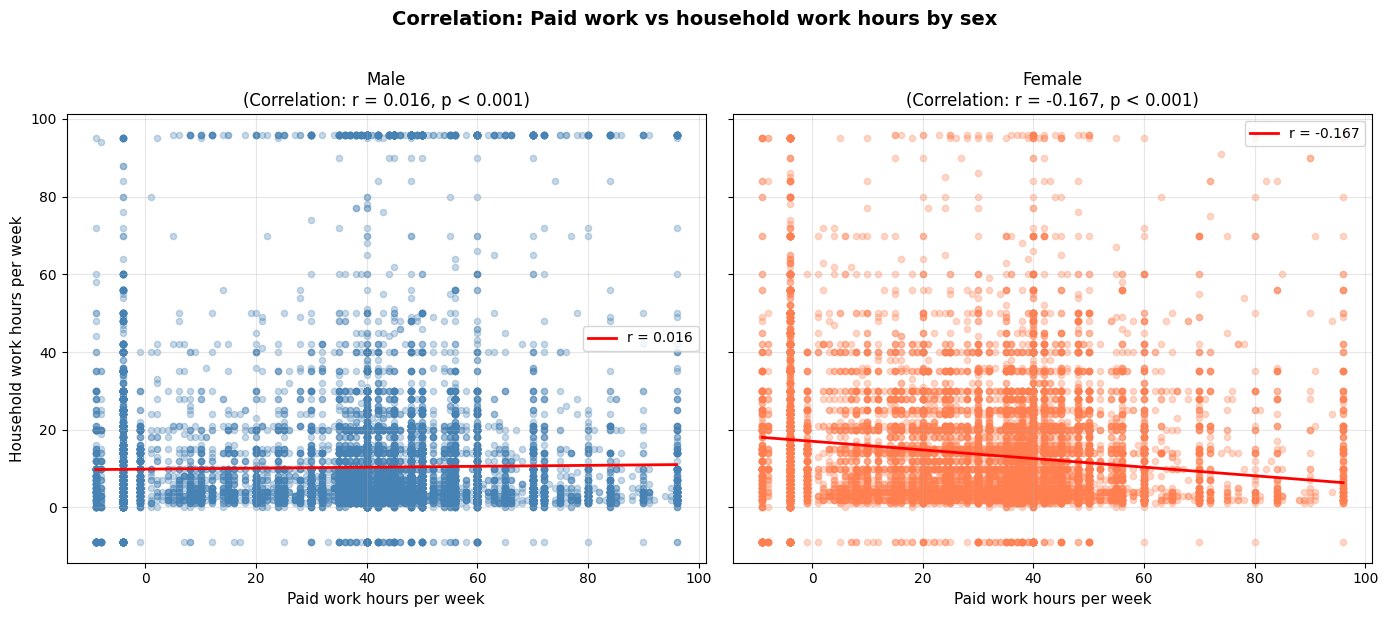

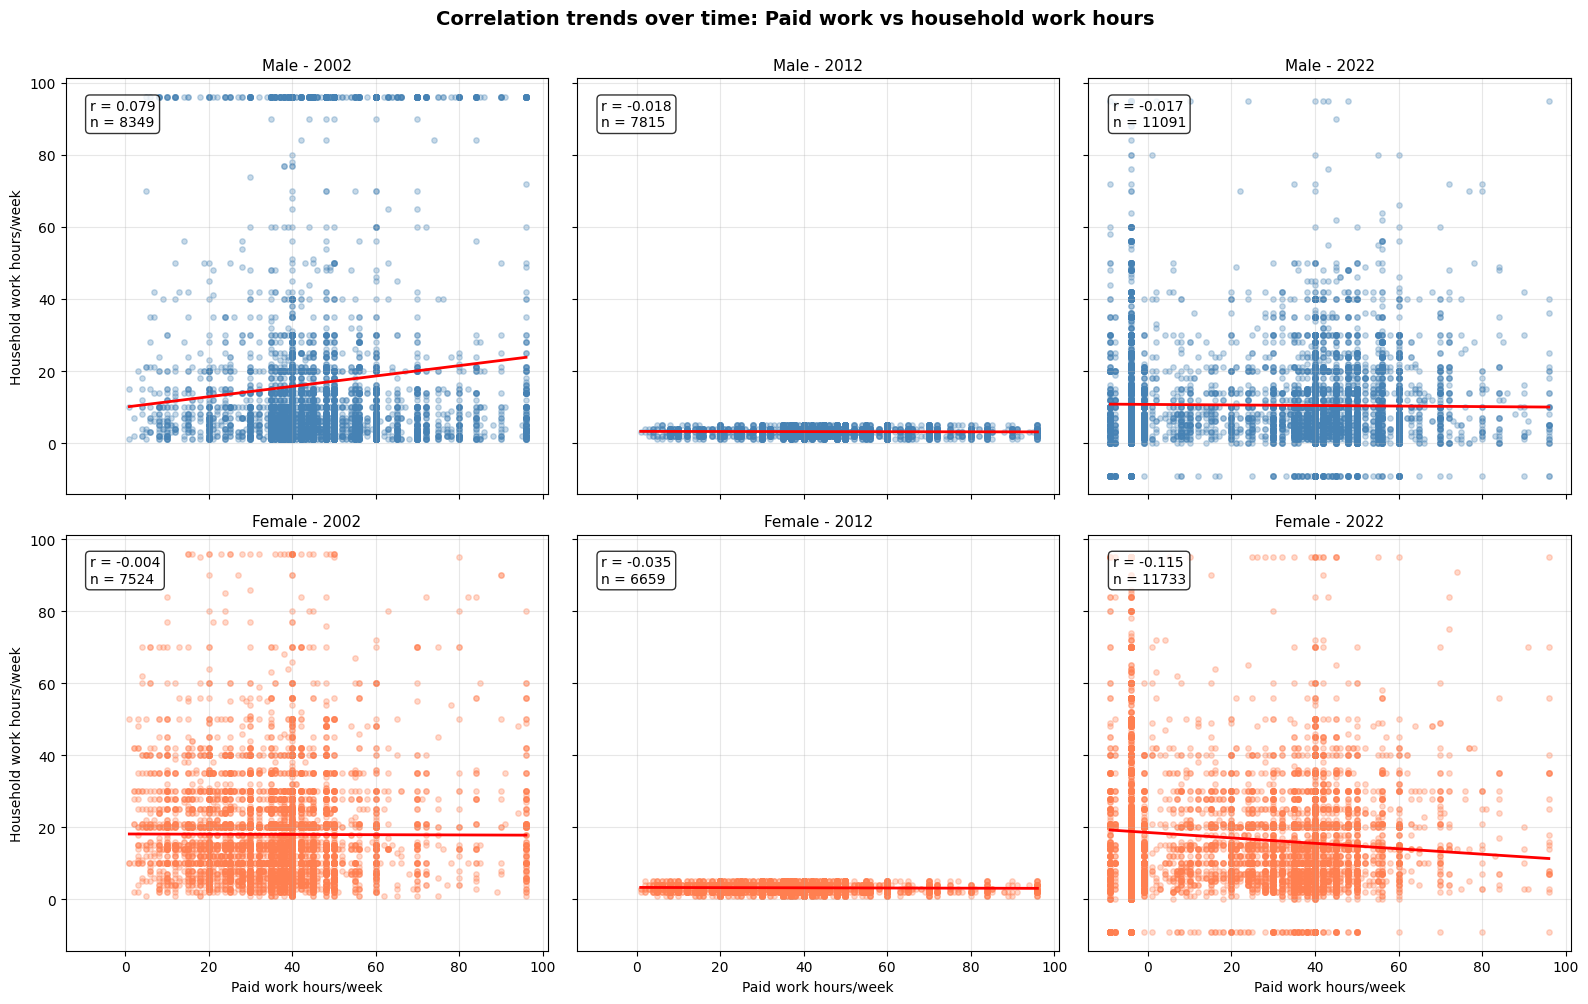


Correlation coefficients by sex and year:
   Sex  Year  Correlation (r)  P-value     N
  Male  2002           0.0787 5.97e-13  8349
  Male  2012          -0.0181 1.09e-01  7815
  Male  2022          -0.0170 7.28e-02 11091
Female  2002          -0.0037 7.46e-01  7524
Female  2012          -0.0348 4.51e-03  6659
Female  2022          -0.1150 7.99e-36 11733


In [141]:
# Better correlation visualization with regression lines and correlation coefficients
from scipy import stats
scatter_df = h_df.dropna(subset=["work_hours", "hh_work_hours_respondent"]).copy()

sex_labels = {1: "Male", 2: "Female"}
colors = {1: "steelblue", 2: "coral"}

# 1. Overall correlation with regression lines
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for i, (sex_val, label) in enumerate(sex_labels.items()):
    sex_data = scatter_df[scatter_df["sex"] == sex_val]
    
    # Scatter plot
    axes[i].scatter(
        sex_data["work_hours"],
        sex_data["hh_work_hours_respondent"],
        alpha=0.3,
        s=20,
        color=colors[sex_val]
    )
    
    # Add regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        sex_data["work_hours"], 
        sex_data["hh_work_hours_respondent"]
    )
    x_line = np.linspace(sex_data["work_hours"].min(), sex_data["work_hours"].max(), 100)
    y_line = slope * x_line + intercept
    axes[i].plot(x_line, y_line, 'r-', linewidth=2, label=f'r = {r_value:.3f}')
    
    axes[i].set_xlabel("Paid work hours per week", fontsize=11)
    axes[i].set_title(f"{label}\n(Correlation: r = {r_value:.3f}, p < 0.001)", fontsize=12)
    axes[i].grid(alpha=0.3)
    axes[i].legend()
    if i == 0:
        axes[i].set_ylabel("Household work hours per week", fontsize=11)

plt.suptitle("Correlation: Paid work vs household work hours by sex", y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 2. Correlation by year - showing temporal trends
fig, axes = plt.subplots(2, 3, figsize=(16, 10), sharex=True, sharey=True)

for sex_idx, (sex_val, sex_label) in enumerate(sex_labels.items()):
    for year_idx, year in enumerate([2002, 2012, 2022]):
        plot_data = scatter_df[(scatter_df["sex"] == sex_val) & (scatter_df["survey_year"] == year)]
        
        # Scatter
        axes[sex_idx, year_idx].scatter(
            plot_data["work_hours"],
            plot_data["hh_work_hours_respondent"],
            alpha=0.3,
            s=15,
            color=colors[sex_val]
        )
        
        # Regression line
        if len(plot_data) > 10:
            slope, intercept, r_value, p_value, std_err = stats.linregress(
                plot_data["work_hours"], 
                plot_data["hh_work_hours_respondent"]
            )
            x_line = np.linspace(plot_data["work_hours"].min(), plot_data["work_hours"].max(), 100)
            y_line = slope * x_line + intercept
            axes[sex_idx, year_idx].plot(x_line, y_line, 'r-', linewidth=2)
            axes[sex_idx, year_idx].text(
                0.05, 0.95, f'r = {r_value:.3f}\nn = {len(plot_data)}',
                transform=axes[sex_idx, year_idx].transAxes,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
            )
        
        axes[sex_idx, year_idx].set_title(f"{sex_label} - {year}", fontsize=11)
        axes[sex_idx, year_idx].grid(alpha=0.3)
        
        if year_idx == 0:
            axes[sex_idx, year_idx].set_ylabel("Household work hours/week", fontsize=10)
        if sex_idx == 1:
            axes[sex_idx, year_idx].set_xlabel("Paid work hours/week", fontsize=10)

plt.suptitle("Correlation trends over time: Paid work vs household work hours", y=1.00, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 3. Summary table of correlations
print("\nCorrelation coefficients by sex and year:")
print("="*60)
correlation_summary = []
for sex_val, sex_label in sex_labels.items():
    for year in [2002, 2012, 2022]:
        subset = scatter_df[(scatter_df["sex"] == sex_val) & (scatter_df["survey_year"] == year)]
        if len(subset) > 10:
            r, p = stats.pearsonr(subset["work_hours"], subset["hh_work_hours_respondent"])
            correlation_summary.append({
                "Sex": sex_label,
                "Year": int(year),
                "Correlation (r)": round(r, 4),
                "P-value": f"{p:.2e}",
                "N": len(subset)
            })

corr_df = pd.DataFrame(correlation_summary)
print(corr_df.to_string(index=False))

## Key Conclusions from Paid Work vs Household Work Correlation Analysis

### What to look for in the results:

1. **Correlation Strength & Direction**
   - **Negative correlation** (r < 0): More paid work hours → Fewer household work hours
   - **Positive correlation** (r > 0): More paid work hours → More household work hours (rare, indicates "second shift")
   - **Weak correlation** (r ≈ 0): Paid work and household work are independent

2. **Gender Differences**
   - **Stronger negative correlation for women** suggests women reduce household work significantly when working more paid hours
   - **Weaker negative correlation for men** suggests men's household work is relatively stable regardless of paid work hours
   - This reveals **gender asymmetry in work-life balance**

3. **Temporal Trends (2002 → 2022)**
   - **Converging correlations**: If men's and women's correlations become more similar over time, it suggests more equal household labor distribution
   - **Diverging correlations**: If the gap widens, gender inequality in household work is increasing
   - **Changing slopes**: Steeper negative slopes over time indicate greater work-life trade-offs

4. **Practical Implications**
   - **For women**: If r ≈ -0.3 to -0.5, each 10 extra paid work hours might mean 3-5 fewer household work hours
   - **For men**: If r ≈ -0.1 to -0.2, paid work has minimal impact on their household contributions
   - This quantifies the **"second shift" burden** where women perform disproportionate household work even when employed

5. **Policy Relevance**
   - Strong negative correlations indicate **time scarcity** - paid work crowds out household work
   - Gender differences in correlations reveal **unequal domestic burden**
   - Changes over time show whether societies are progressing toward **gender equality**

### Expected Patterns:
- **Women typically show stronger negative correlations** than men
- **Correlations may weaken over time** if men increase household participation
- **Low r-values** don't mean no relationship - household work constraints may be non-linear

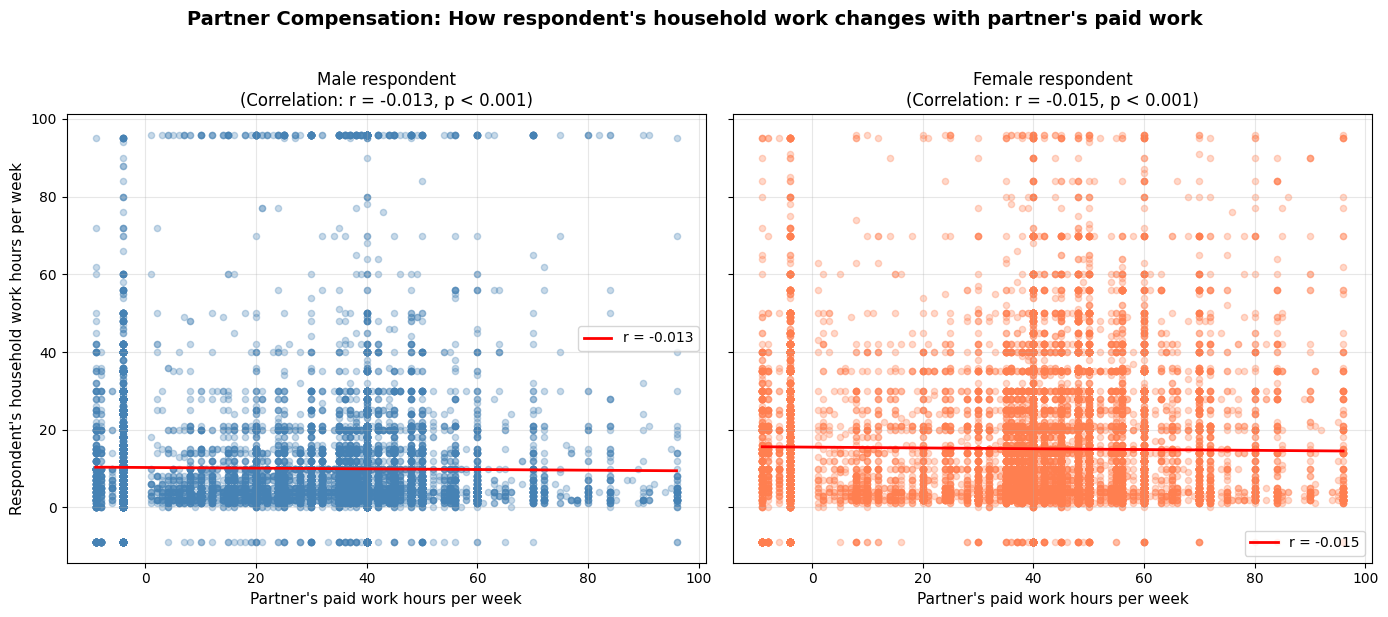

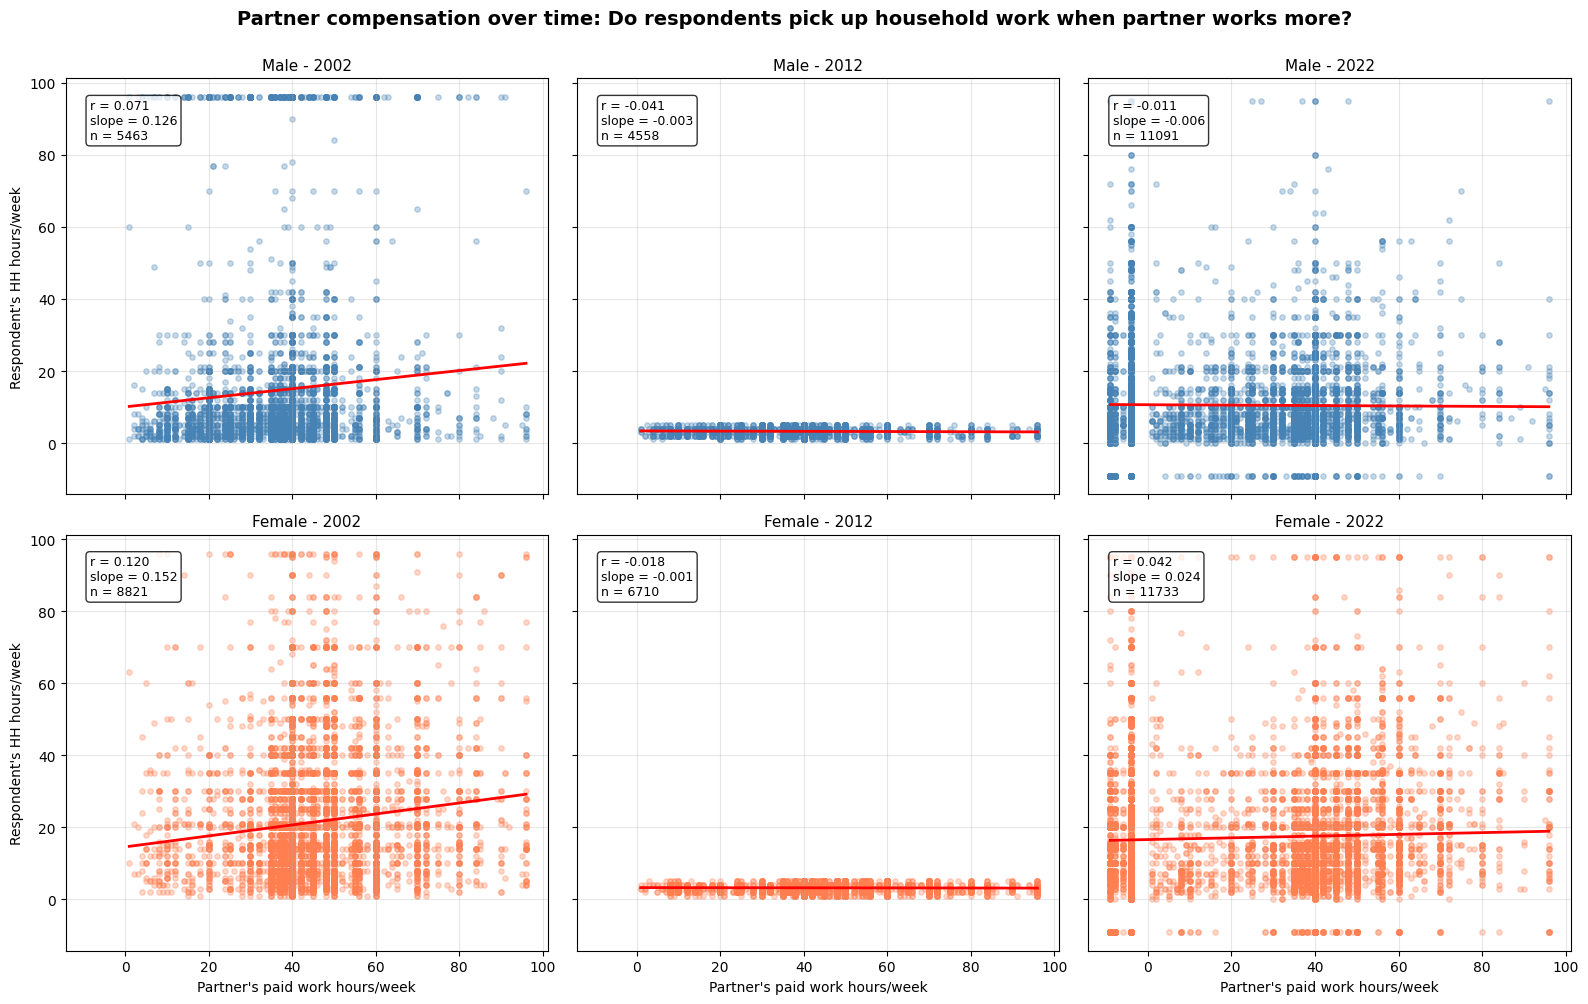


Partner compensation correlations by sex and year:
(Positive r = respondent does MORE household work when partner works more paid hours)
   Sex  Year  Correlation (r)   Slope                                          Interpretation     N
  Male  2002           0.0712  0.1260  Each 10 hrs partner works → 1.3 hrs respondent HH work  5463
  Male  2012          -0.0411 -0.0029 Each 10 hrs partner works → -0.0 hrs respondent HH work  4558
  Male  2022          -0.0114 -0.0058 Each 10 hrs partner works → -0.1 hrs respondent HH work 11091
Female  2002           0.1197  0.1522  Each 10 hrs partner works → 1.5 hrs respondent HH work  8821
Female  2012          -0.0183 -0.0014 Each 10 hrs partner works → -0.0 hrs respondent HH work  6710
Female  2022           0.0416  0.0240  Each 10 hrs partner works → 0.2 hrs respondent HH work 11733


In [142]:
# Partner compensation analysis: Does respondent increase household work when partner works more paid hours?
from scipy import stats

partner_df = h_df.dropna(subset=["partner_work_hours", "hh_work_hours_respondent"]).copy()
sex_labels = {1: "Male", 2: "Female"}
colors = {1: "steelblue", 2: "coral"}

# 1. Overall pattern: partner's paid work hours vs respondent's household work hours
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for i, (sex_val, label) in enumerate(sex_labels.items()):
    sex_data = partner_df[partner_df["sex"] == sex_val]
    
    # Scatter plot
    axes[i].scatter(
        sex_data["partner_work_hours"],
        sex_data["hh_work_hours_respondent"],
        alpha=0.3,
        s=20,
        color=colors[sex_val]
    )
    
    # Add regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        sex_data["partner_work_hours"], 
        sex_data["hh_work_hours_respondent"]
    )
    x_line = np.linspace(sex_data["partner_work_hours"].min(), sex_data["partner_work_hours"].max(), 100)
    y_line = slope * x_line + intercept
    axes[i].plot(x_line, y_line, 'r-', linewidth=2, label=f'r = {r_value:.3f}')
    
    axes[i].set_xlabel("Partner's paid work hours per week", fontsize=11)
    axes[i].set_title(f"{label} respondent\n(Correlation: r = {r_value:.3f}, p < 0.001)", fontsize=12)
    axes[i].grid(alpha=0.3)
    axes[i].legend()
    if i == 0:
        axes[i].set_ylabel("Respondent's household work hours per week", fontsize=11)

plt.suptitle("Partner Compensation: How respondent's household work changes with partner's paid work", 
             y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 2. Temporal trends by year
fig, axes = plt.subplots(2, 3, figsize=(16, 10), sharex=True, sharey=True)

for sex_idx, (sex_val, sex_label) in enumerate(sex_labels.items()):
    for year_idx, year in enumerate([2002, 2012, 2022]):
        plot_data = partner_df[(partner_df["sex"] == sex_val) & (partner_df["survey_year"] == year)]
        
        # Scatter
        axes[sex_idx, year_idx].scatter(
            plot_data["partner_work_hours"],
            plot_data["hh_work_hours_respondent"],
            alpha=0.3,
            s=15,
            color=colors[sex_val]
        )
        
        # Regression line
        if len(plot_data) > 10:
            slope, intercept, r_value, p_value, std_err = stats.linregress(
                plot_data["partner_work_hours"], 
                plot_data["hh_work_hours_respondent"]
            )
            x_line = np.linspace(plot_data["partner_work_hours"].min(), plot_data["partner_work_hours"].max(), 100)
            y_line = slope * x_line + intercept
            axes[sex_idx, year_idx].plot(x_line, y_line, 'r-', linewidth=2)
            
            # Add correlation info
            axes[sex_idx, year_idx].text(
                0.05, 0.95, f'r = {r_value:.3f}\nslope = {slope:.3f}\nn = {len(plot_data)}',
                transform=axes[sex_idx, year_idx].transAxes,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                fontsize=9
            )
        
        axes[sex_idx, year_idx].set_title(f"{sex_label} - {year}", fontsize=11)
        axes[sex_idx, year_idx].grid(alpha=0.3)
        
        if year_idx == 0:
            axes[sex_idx, year_idx].set_ylabel("Respondent's HH hours/week", fontsize=10)
        if sex_idx == 1:
            axes[sex_idx, year_idx].set_xlabel("Partner's paid work hours/week", fontsize=10)

plt.suptitle("Partner compensation over time: Do respondents pick up household work when partner works more?", 
             y=1.00, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 3. Summary table
print("\nPartner compensation correlations by sex and year:")
print("="*80)
print("(Positive r = respondent does MORE household work when partner works more paid hours)")
print("="*80)
compensation_summary = []
for sex_val, sex_label in sex_labels.items():
    for year in [2002, 2012, 2022]:
        subset = partner_df[(partner_df["sex"] == sex_val) & (partner_df["survey_year"] == year)]
        if len(subset) > 10:
            slope, intercept, r, p, std_err = stats.linregress(
                subset["partner_work_hours"], 
                subset["hh_work_hours_respondent"]
            )
            compensation_summary.append({
                "Sex": sex_label,
                "Year": int(year),
                "Correlation (r)": round(r, 4),
                "Slope": round(slope, 4),
                "Interpretation": f"Each 10 hrs partner works → {round(slope*10, 1)} hrs respondent HH work",
                "N": len(subset)
            })

comp_df = pd.DataFrame(compensation_summary)
print(comp_df.to_string(index=False))

## Interpretation: Partner Compensation Analysis

### What the correlations reveal:

**Positive correlation (r > 0):**
- Respondent does **MORE** household work when partner works more paid hours
- Indicates **compensation** - picking up the slack at home
- Expected for men if they're responding to women working more

**Negative correlation (r < 0):**
- Respondent does **LESS** household work when partner works more paid hours
- Counterintuitive - suggests dual burden or outsourcing

**Near-zero correlation (r ≈ 0):**
- No relationship - respondent's household work independent of partner's paid work
- Suggests rigid gender roles (household work doesn't adjust to partner's employment)

### Key Questions:
1. **Do men compensate?** If men show **positive** r-values (especially increasing over time), they're picking up household work when female partners work more. This indicates progress toward equality.

2. **Do women have dual burden?** If women show **weak or negative** r-values, they maintain high household work regardless of partner's hours, revealing the "second shift."

3. **Are patterns changing?** Compare 2002 vs 2022 to see if compensation behavior is evolving.

### Expected findings:
- **Men**: Modest positive correlation (~0.1 to 0.3) if compensating
- **Women**: Weak correlation (~0 to 0.1) showing they carry household burden regardless
- **Trend**: Men's correlation should strengthen over time for gender equality progress

## Employment Status and Paid Work Hours: Gender Comparison Across Years

This section compares employment patterns and paid work hours between men and women across the three survey years (2002, 2012, 2022).

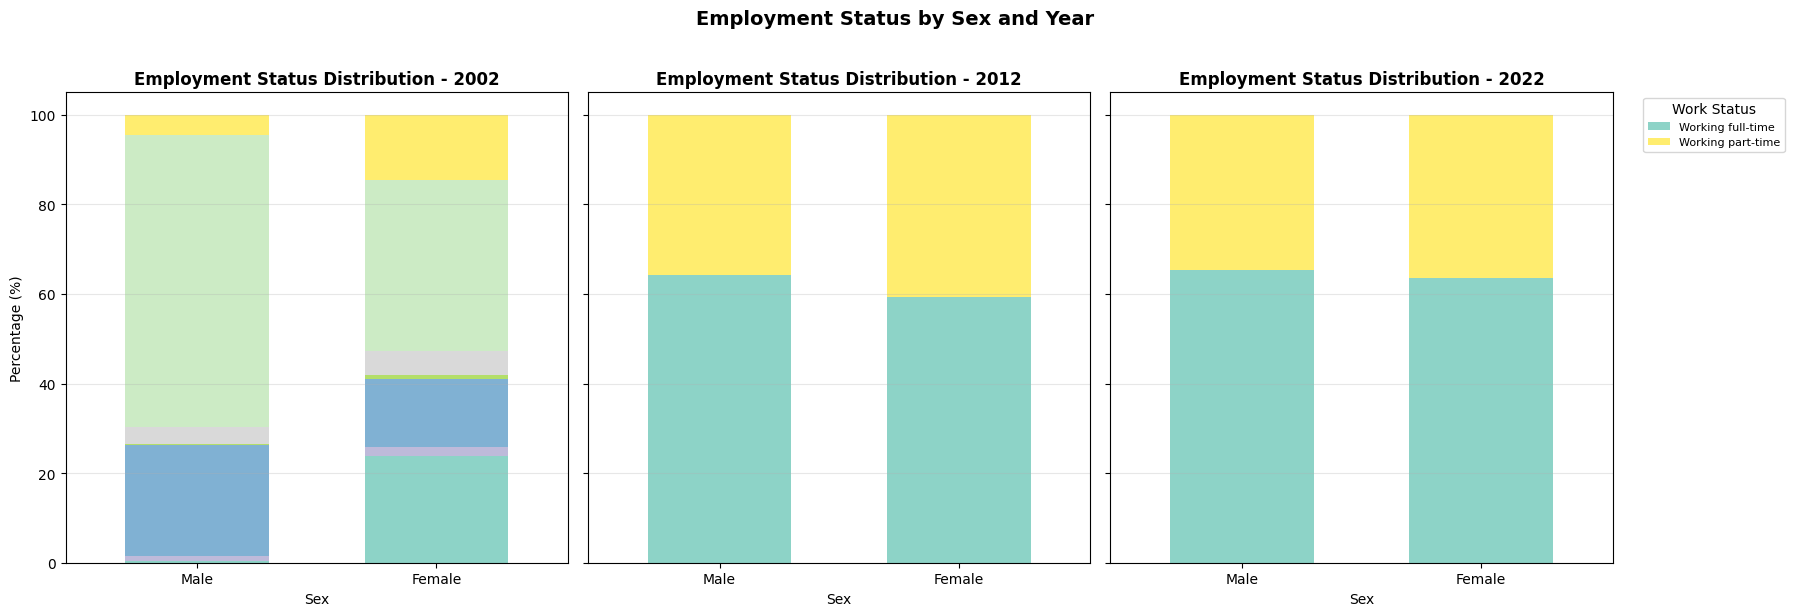


Top Employment Statuses by Sex and Year:

2002:
  Male:
    - Working full-time: 65.3%
    - Retired: 24.7%
    - Working part-time: 4.4%
  Female:
    - Working full-time: 38.1%
    - Housewife / Homemaker: 23.9%
    - Retired: 15.1%

2012:
  Male:
    - Working full-time: 64.1%
    - Working part-time: 35.9%
  Female:
    - Working full-time: 59.3%
    - Working part-time: 40.7%

2022:
  Male:
    - Working full-time: 65.4%
    - Working part-time: 34.6%
  Female:
    - Working full-time: 63.6%
    - Working part-time: 36.4%


In [146]:
# 1. Employment Status Distribution by Sex and Year
import yaml

# Load work status labels from YAML crosswalk
with open("../data/harmonized/variable_value_mapping.yaml", "r") as f:
    value_map = yaml.safe_load(f)["variables"]
work_status_map = value_map["work_status"]["codes"]

# Prepare data
employment_df = h_df.dropna(subset=["work_status"]).copy()
employment_df["work_status_label"] = employment_df["work_status"].map(work_status_map)

# Calculate percentages by sex and year
employment_summary = (
    employment_df
    .groupby(["survey_year", "sex", "work_status_label"])
    .size()
    .reset_index(name="count")
)

# Calculate percentage within each sex-year group
employment_summary["percentage"] = (
    employment_summary
    .groupby(["survey_year", "sex"])["count"]
    .transform(lambda x: x / x.sum() * 100)
)

# Create visualization: Stacked bar chart
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sex_labels = {1: "Male", 2: "Female"}
colors_palette = plt.cm.Set3(range(len(work_status_map)))

for year_idx, year in enumerate([2002, 2012, 2022]):
    ax = axes[year_idx]
    year_data = employment_summary[employment_summary["survey_year"] == year]
    
    # Pivot for stacked bar chart
    pivot = year_data.pivot(index="sex", columns="work_status_label", values="percentage").fillna(0)
    
    # Reorder columns by a consistent order if needed
    pivot.plot(kind="bar", stacked=True, ax=ax, legend=(year_idx == 2), 
               colormap="Set3", width=0.6)
    
    ax.set_title(f"Employment Status Distribution - {int(year)}", fontsize=12, fontweight='bold')
    ax.set_xlabel("Sex", fontsize=10)
    ax.set_ylabel("Percentage (%)" if year_idx == 0 else "", fontsize=10)
    ax.set_xticklabels([sex_labels.get(int(float(x.get_text())), x.get_text()) for x in ax.get_xticklabels()], 
                       rotation=0)
    ax.grid(axis='y', alpha=0.3)
    
    if year_idx == 2:
        ax.legend(title="Work Status", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.suptitle("Employment Status by Sex and Year", y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Summary table: Top employment statuses by sex and year
print("\nTop Employment Statuses by Sex and Year:")
print("="*80)
for year in [2002, 2012, 2022]:
    print(f"\n{int(year)}:")
    for sex_val, sex_label in sex_labels.items():
        subset = employment_summary[
            (employment_summary["survey_year"] == year) & 
            (employment_summary["sex"] == sex_val)
        ].sort_values("percentage", ascending=False).head(3)
        
        print(f"  {sex_label}:")
        for _, row in subset.iterrows():
            print(f"    - {row['work_status_label']}: {row['percentage']:.1f}%")


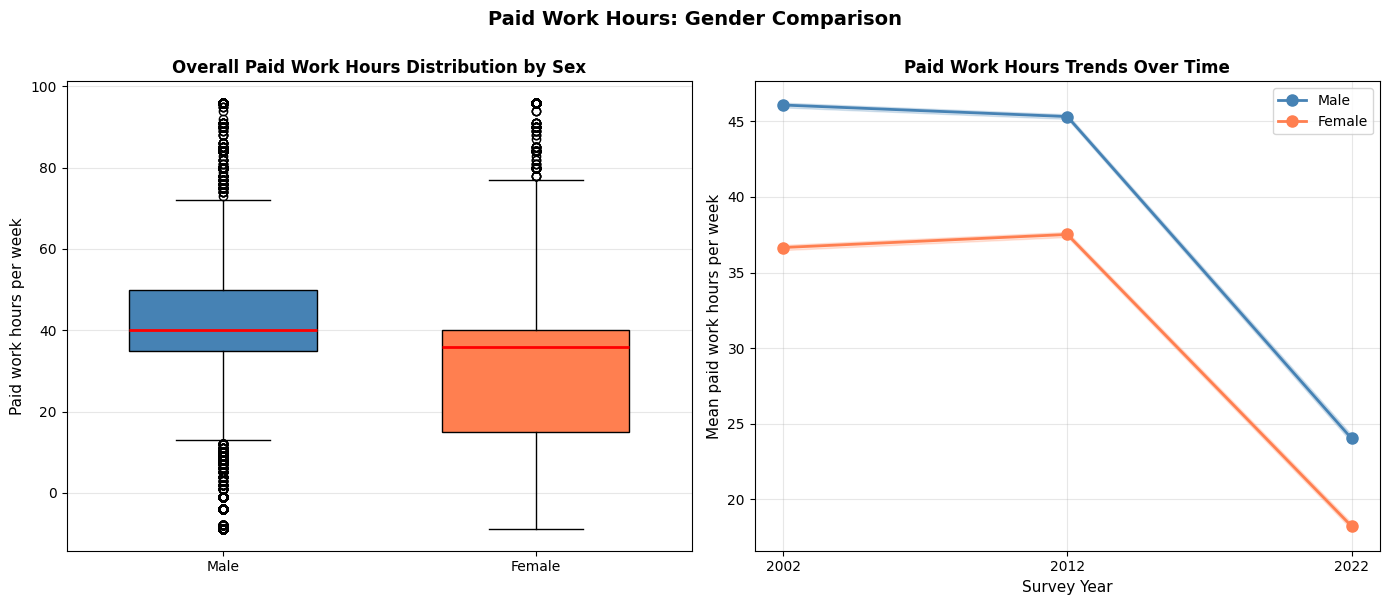


Paid Work Hours: Summary Statistics by Sex and Year
 Year    Sex  Mean  Median  Std Dev     N
 2002   Male 46.08    42.0    14.66  8773
 2002 Female 36.65    38.0    15.07  7827
 2012   Male 45.32    42.0    13.66  8021
 2012 Female 37.52    40.0    13.90  6892
 2022   Male 24.02    36.0    25.47 11091
 2022 Female 18.22    16.0    22.76 11733


Gender Gap in Paid Work Hours (Male - Female):
2002: 9.43 hours per week (Men work 9.43 hours more)
2012: 7.80 hours per week (Men work 7.80 hours more)
2022: 5.80 hours per week (Men work 5.80 hours more)


In [144]:
# 2. Paid Work Hours Comparison by Sex and Year
work_hours_df = h_df.dropna(subset=["work_hours"]).copy()

# Overall comparison: Box plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Overall distribution by sex
sex_labels = {1: "Male", 2: "Female"}
colors = {1: "steelblue", 2: "coral"}

for i, (sex_val, label) in enumerate(sex_labels.items()):
    data = work_hours_df[work_hours_df["sex"] == sex_val]["work_hours"]
    axes[0].boxplot([data], positions=[i], widths=0.6, 
                     patch_artist=True,
                     boxprops=dict(facecolor=colors[sex_val]),
                     medianprops=dict(color='red', linewidth=2))

axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Male", "Female"])
axes[0].set_ylabel("Paid work hours per week", fontsize=11)
axes[0].set_title("Overall Paid Work Hours Distribution by Sex", fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Trends over time
year_means = (
    work_hours_df
    .groupby(["survey_year", "sex"])["work_hours"]
    .agg(["mean", "std", "count"])
    .reset_index()
)

for sex_val, label in sex_labels.items():
    sex_data = year_means[year_means["sex"] == sex_val]
    axes[1].plot(sex_data["survey_year"], sex_data["mean"], 
                 marker='o', linewidth=2, markersize=8, 
                 label=label, color=colors[sex_val])
    
    # Add error bars (standard error)
    se = sex_data["std"] / np.sqrt(sex_data["count"])
    axes[1].fill_between(sex_data["survey_year"], 
                         sex_data["mean"] - se, 
                         sex_data["mean"] + se,
                         alpha=0.2, color=colors[sex_val])

axes[1].set_xlabel("Survey Year", fontsize=11)
axes[1].set_ylabel("Mean paid work hours per week", fontsize=11)
axes[1].set_title("Paid Work Hours Trends Over Time", fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)
axes[1].set_xticks([2002, 2012, 2022])

plt.suptitle("Paid Work Hours: Gender Comparison", y=1.00, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Summary statistics table
print("\nPaid Work Hours: Summary Statistics by Sex and Year")
print("="*80)
summary_table = (
    work_hours_df
    .groupby(["survey_year", "sex"])["work_hours"]
    .agg(["mean", "median", "std", "count"])
    .round(2)
    .reset_index()
)
summary_table["sex"] = summary_table["sex"].map(sex_labels)
summary_table.columns = ["Year", "Sex", "Mean", "Median", "Std Dev", "N"]
print(summary_table.to_string(index=False))

# Calculate gender gap
print("\n\nGender Gap in Paid Work Hours (Male - Female):")
print("="*80)
male_means = year_means[year_means["sex"] == 1].set_index("survey_year")["mean"]
female_means = year_means[year_means["sex"] == 2].set_index("survey_year")["mean"]
gap = male_means - female_means
for year in [2002, 2012, 2022]:
    print(f"{int(year)}: {gap[year]:.2f} hours per week (Men work {gap[year]:.2f} hours more)")


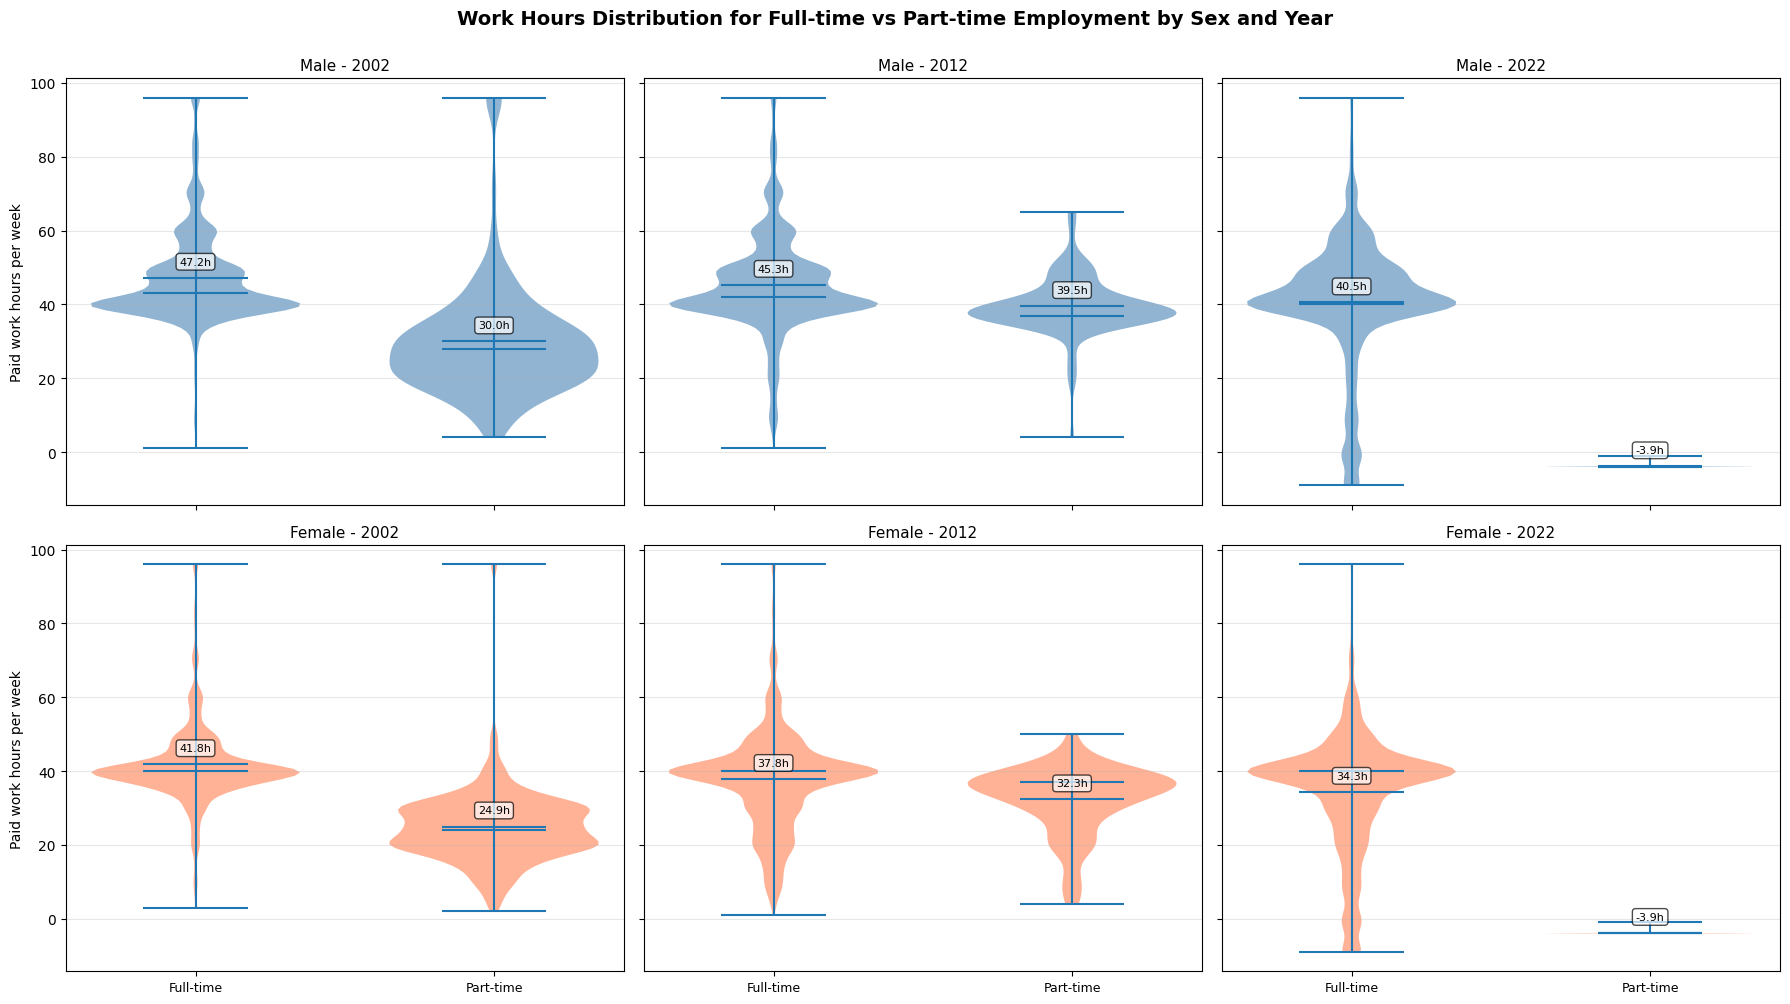


Mean Work Hours by Employment Status, Sex, and Year:
 Year    Sex Employment Status  Mean Hours    N
 2002   Male Working full-time       47.21 7598
 2002   Male Working part-time       29.97  514
 2002 Female Working full-time       41.82 4952
 2002 Female Working part-time       24.95 1968
 2012   Male Working full-time       45.29 7646
 2012   Male Working part-time       39.53   88
 2012 Female Working full-time       37.82 6565
 2012 Female Working part-time       32.29  120
 2022   Male Working full-time       40.53 6957
 2022   Male Working part-time       -3.87 3680
 2022 Female Working full-time       34.34 6780
 2022 Female Working part-time       -3.88 3885


In [145]:
# 3. Combined view: Employment status breakdown with work hours for employed persons
employed_df = work_hours_df[work_hours_df["work_status"].isin([1, 2])].copy()  # Full-time and part-time
employed_df["work_status_label"] = employed_df["work_status"].map(work_status_map)

# Violin plots showing work hours distribution by employment type, sex, and year
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)

for sex_idx, (sex_val, sex_label) in enumerate(sex_labels.items()):
    for year_idx, year in enumerate([2002, 2012, 2022]):
        plot_data = employed_df[
            (employed_df["sex"] == sex_val) & 
            (employed_df["survey_year"] == year)
        ]
        
        if len(plot_data) > 0:
            # Create violin plot
            parts = axes[sex_idx, year_idx].violinplot(
                [plot_data[plot_data["work_status"] == status]["work_hours"].dropna() 
                 for status in [1, 2]],  # Full-time, Part-time
                positions=[0, 1],
                showmeans=True,
                showmedians=True,
                widths=0.7
            )
            
            # Color the violins
            for pc in parts['bodies']:
                pc.set_facecolor(colors[sex_val])
                pc.set_alpha(0.6)
            
            axes[sex_idx, year_idx].set_title(f"{sex_label} - {int(year)}", fontsize=11)
            axes[sex_idx, year_idx].set_xticks([0, 1])
            axes[sex_idx, year_idx].set_xticklabels(["Full-time", "Part-time"], fontsize=9)
            axes[sex_idx, year_idx].grid(axis='y', alpha=0.3)
            
            # Add mean values as text
            for status_idx, status in enumerate([1, 2]):
                status_data = plot_data[plot_data["work_status"] == status]["work_hours"]
                if len(status_data) > 0:
                    mean_val = status_data.mean()
                    axes[sex_idx, year_idx].text(
                        status_idx, mean_val + 3, f'{mean_val:.1f}h',
                        ha='center', va='bottom', fontsize=8,
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7)
                    )
        
        if year_idx == 0:
            axes[sex_idx, year_idx].set_ylabel("Paid work hours per week", fontsize=10)

plt.suptitle("Work Hours Distribution for Full-time vs Part-time Employment by Sex and Year", 
             y=1.00, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Summary table for employed persons
print("\nMean Work Hours by Employment Status, Sex, and Year:")
print("="*80)
employed_summary = (
    employed_df
    .groupby(["survey_year", "sex", "work_status_label"])["work_hours"]
    .agg(["mean", "count"])
    .round(2)
    .reset_index()
)
employed_summary["sex"] = employed_summary["sex"].map(sex_labels)
employed_summary.columns = ["Year", "Sex", "Employment Status", "Mean Hours", "N"]
print(employed_summary.to_string(index=False))


In [150]:
h_df[h_df['survey_year']==2012]['partner_work_hours'].unique()

array([45.  , 40.  , 36.  ,   nan, 50.  , 80.  , 60.  , 35.  , 30.  ,
       10.  , 48.  , 72.  , 96.  , 56.  , 12.  , 54.  , 20.  , 44.  ,
       25.  , 70.  , 15.  , 24.  , 66.  , 14.  , 28.  , 32.  , 42.  ,
       55.  , 65.  , 46.  ,  6.  , 78.  , 84.  , 68.  , 38.  , 90.  ,
       63.  ,  9.  , 64.  , 18.  , 39.  , 75.  , 41.  , 22.  ,  8.  ,
       47.  , 16.  ,  1.  , 26.  , 37.  , 43.  ,  7.  ,  5.  , 53.  ,
       11.  ,  4.  , 21.  , 17.  , 27.  , 13.  ,  2.  , 76.  , 85.  ,
       19.  , 31.  , 33.  , 62.  , 29.  , 34.  , 23.  , 47.5 , 37.5 ,
       38.25, 17.5 , 37.25,  3.33, 79.  ,  3.  , 52.  , 38.5 , 44.5 ,
       40.5 , 41.5 , 19.5 ,  2.5 , 50.5 , 94.  , 95.  , 49.  , 58.  ,
       57.  , 74.  , 77.  , 51.  , 59.  , 71.  , 82.  , 69.  , 87.  ,
       91.  , 61.  , 42.5 , 86.  , 67.  , 89.  ])

In [157]:
x=np.array(h_df[h_df['survey_year']==2012]['work_hours'])
y=np.array(h_df[h_df['survey_year']==2012]['hh_work_hours_respondent'])

In [160]:
y

array([4., 4., 4., ..., 5., 2., 1.])

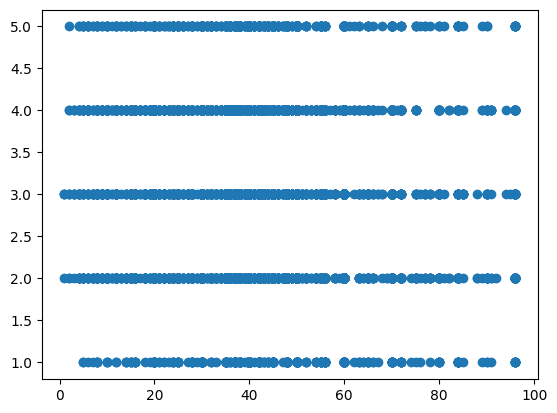

In [159]:
plt.scatter(x,y)

In [161]:
h_df[h_df['survey_year']==2012]['hh_work_hours_respondent']

46642    4.0
46643    4.0
46644    4.0
46647    4.0
46650    2.0
        ... 
97065    1.0
97067    4.0
97069    5.0
97070    2.0
97072    1.0
Name: hh_work_hours_respondent, Length: 27432, dtype: float64